<a href="https://colab.research.google.com/github/Urja-Senani/Zomato_EDA-Project/blob/main/EDA_Zomato_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim: Analyze Zomato's dataset to extract meaningful insights that can guide the marketing team in making data-driven decisions to enhance user experience, attract more customers, and improve overall business performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('zomato.csv',encoding='latin-1') #utf-8

In [3]:
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [4]:
df.shape

(9551, 21)

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.info() # object - string (categorical/integer/text)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe() # inly for interger values

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


things to do in EDA

Step 1: Find missing values
step 2: Explore about numerical valieables
step 3: Explore categorical Variables
Step 4: Finding relationship between features

In [8]:
df.isnull().sum() #Fiding missing values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
[features for features in df.columns if df[features].isnull().sum()>1] # list comprehension: features is a valirable which will iterate through df.column if feature is null then show that column name

['Cuisines']

<Axes: >

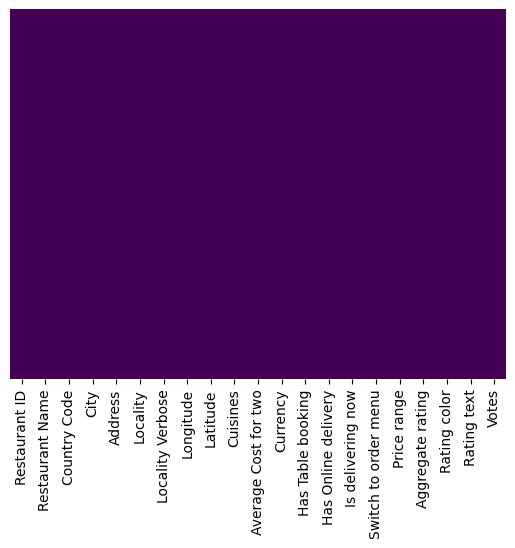

In [10]:
#HEAT MAP

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df_country=pd.read_excel('Country-Code.xlsx')

In [12]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [14]:
#combine 2 data frames

final_df=pd.merge(df,df_country, on='Country Code',how='left' )

In [15]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [16]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [17]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [18]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [19]:
country_names=final_df.Country.value_counts().index

In [20]:
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [21]:
country_value=final_df.Country.value_counts().values

In [22]:
country_value

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

([<matplotlib.patches.Wedge at 0x79dfc49a8b50>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

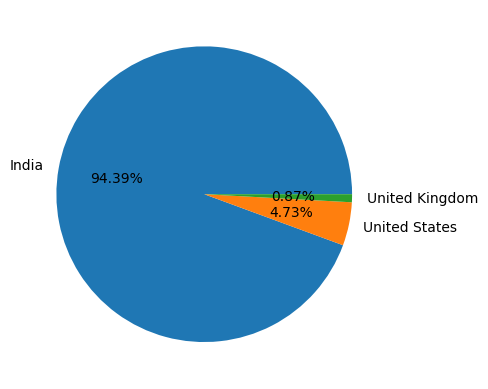

In [23]:
#Pie chart : Top 3 countries that uses zomato

plt.pie(country_value[:3],labels=country_names[:3],autopct='%1.2f%%')

Observation: Zomato maximum records or transaction are from India. After that USA & then UK.

In [24]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [25]:
ratings=final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

In [26]:
ratings

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [27]:
ratings=final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [28]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observation

1. When rating is between 4.5 to 4.9 --->Excellent
2. When rating is between 4.0 to 4.4 --->Very Good
3. When rating is between 3.5 to 3.9 --->Good
4. When rating is between 2.5 to 3.4 --->Average

In [29]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

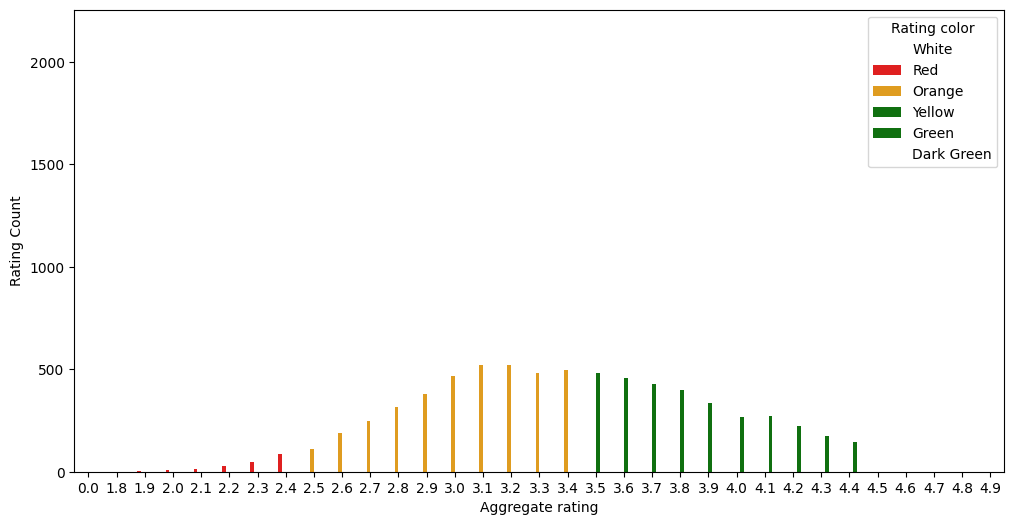

In [30]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x="Aggregate rating",y='Rating Count',hue='Rating color',data=ratings,palette=['white','red','orange','green','green'])

Observation
1. Not rated count is very high
2. Max ratings are between 2.5 and 3.4


<Axes: xlabel='Rating color', ylabel='count'>

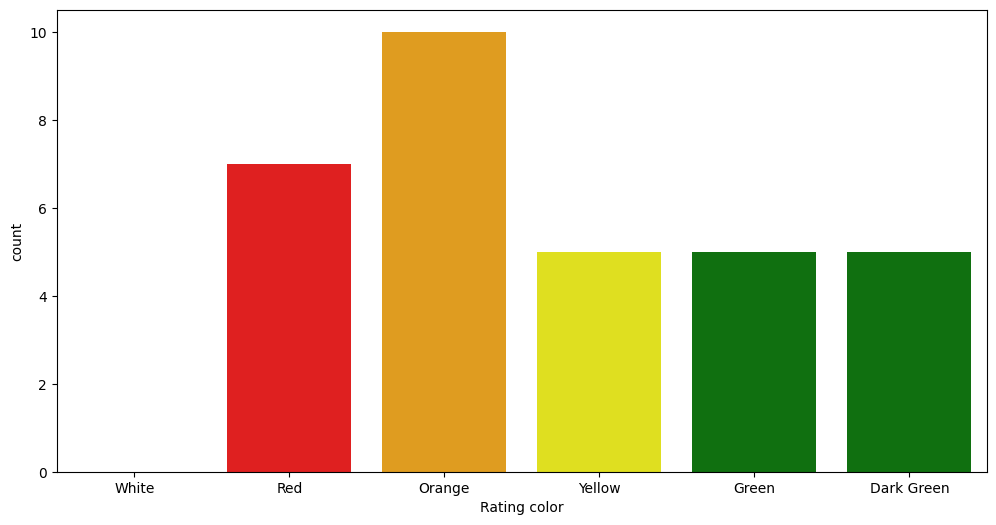

In [31]:
# count plot

sns.countplot(x="Rating color",data=ratings,palette=['white','red','orange','yellow','green','green'])

Observation: Most rating color is Orange followed by red.

In [32]:
# Find the countries name that has given 0 rating

final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


observation -

miximum number od 0 ratings are from Indian customers.

usage of different currencies across the dataset

In [33]:
# Find out which currency is used by which country

final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [34]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [35]:
# which countries do have online delivery

final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [36]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Observation-

Online deliveries are available in India & UAE

In [37]:
# Create a pi chart for cities distribution

final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [38]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [39]:
city_value=final_df.City.value_counts().values

In [40]:
city_value  #values

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1])

In [41]:
city_name=final_df.City.value_counts().index

In [42]:
city_name #index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

([<matplotlib.patches.Wedge at 0x79df83f1ae30>,
 [Text(-0.6836225695617262, 0.8617773392157762, 'New Delhi'),
  Text(0.24897482286810813, -1.0714530029720364, 'Gurgaon'),
  Text(0.9941442744692855, -0.47082604169686504, 'Noida')],
 [Text(-0.37288503794275973, 0.47006036684496877, '71.35%'),
  Text(0.13580444883714987, -0.5844289107120197, '14.57%'),
  Text(0.542260513346883, -0.25681420456192633, '14.08%')])

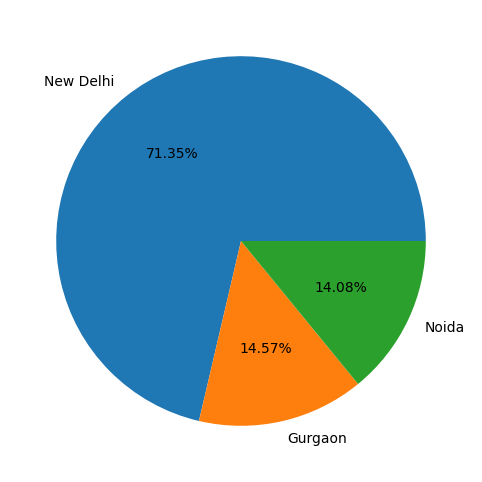

In [43]:
plt.pie(city_value[:3],labels=city_name[:3],autopct='%1.2f%%')

Observation: In India, top 3 cities with most restauraunts are New delhi, gurgaon and Noida.

In [44]:
# Find the top 10 cusines

final_df.Cuisines.value_counts()[:10]

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

Observation: Top 3 cusines are North Indian, Chinees and Fast food.

What is the distribution of restaurants across different countries and cities?

In [45]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [46]:
country_distribution = final_df['Country'].value_counts()

In [47]:
country_distribution

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

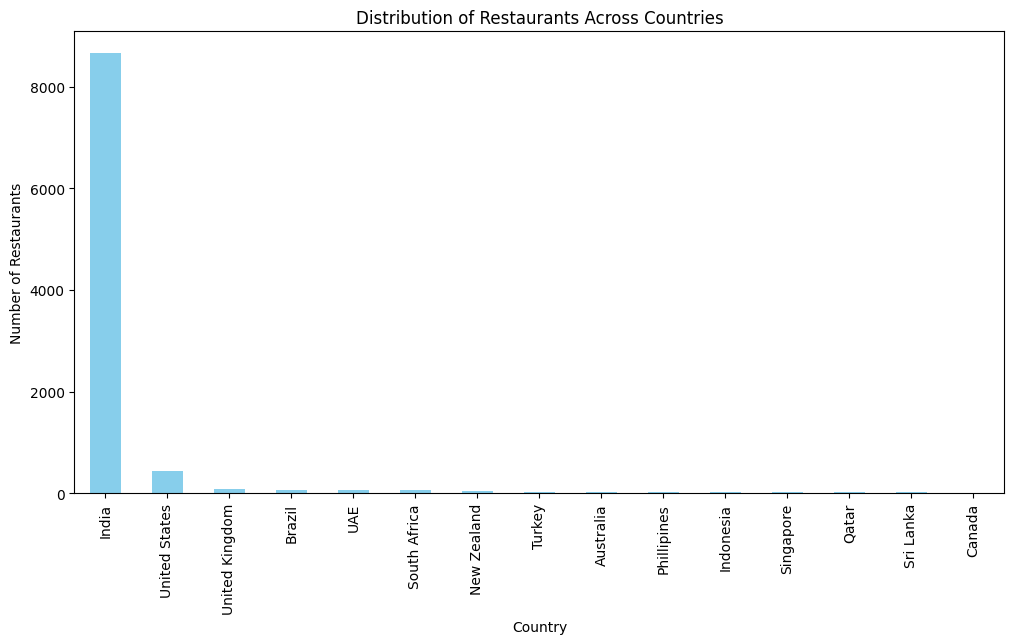

In [48]:
plt.figure(figsize=(12, 6))
country_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Restaurants Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.show()

In [49]:
city_distribution = final_df['City'].value_counts()

In [50]:
city_distribution

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

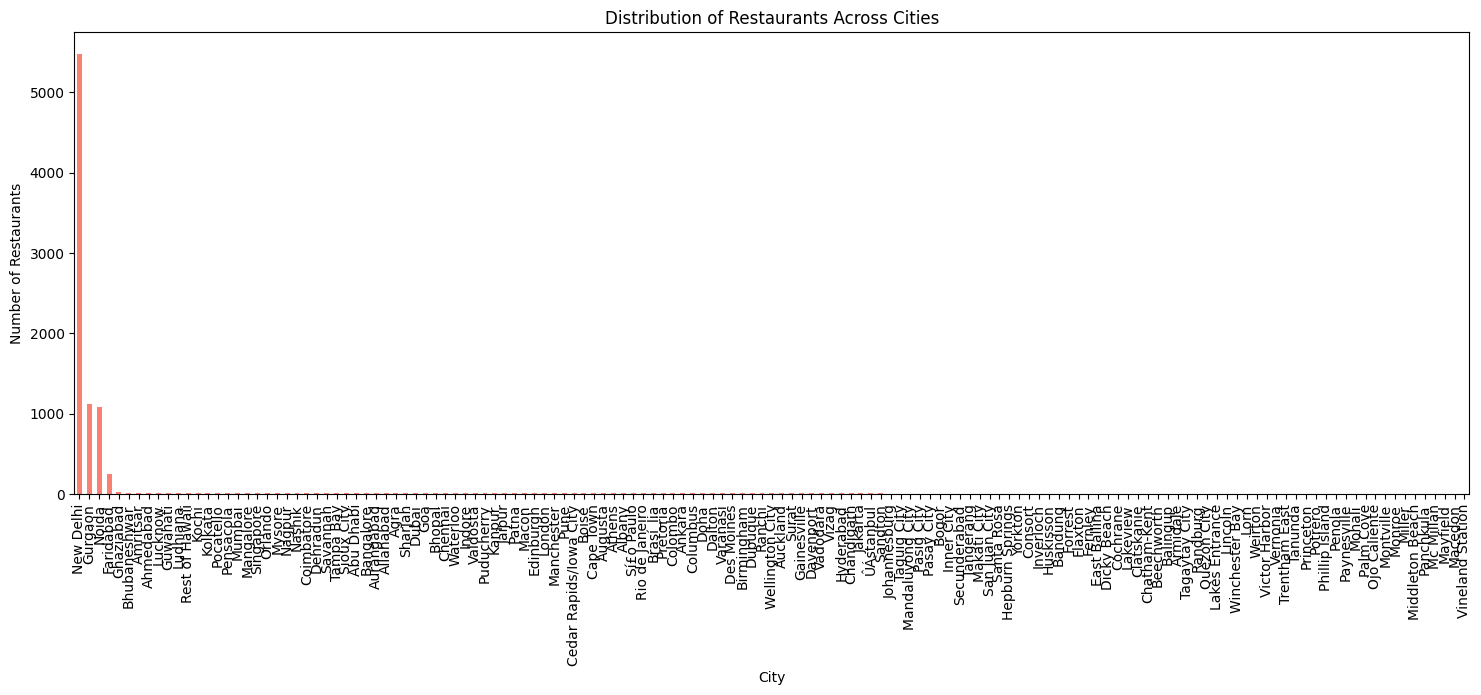

In [51]:
plt.figure(figsize=(18, 6))
city_distribution.plot(kind='bar', color='salmon')
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

In [52]:
indian_restaurants = final_df[final_df['Country'] == 'India']

In [53]:
indian_restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Sagar Nagar, Vizag",83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",...,No,No,No,No,2,3.6,Yellow,Good,193,India
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.000000,0.000000,"Cafe, North Indian, Chinese",...,No,No,No,No,2,3.7,Yellow,Good,85,India
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Siripuram, Vizag",83.315281,17.719539,"Burger, Pizza, Biryani",...,No,No,No,No,2,4.3,Green,Very Good,172,India
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.336840,17.721182,"American, North Indian, Thai, Continental",...,No,No,No,No,4,3.8,Yellow,Good,74,India


In [54]:
city_distribution_india = indian_restaurants['City'].value_counts()

In [55]:
city_distribution_india

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

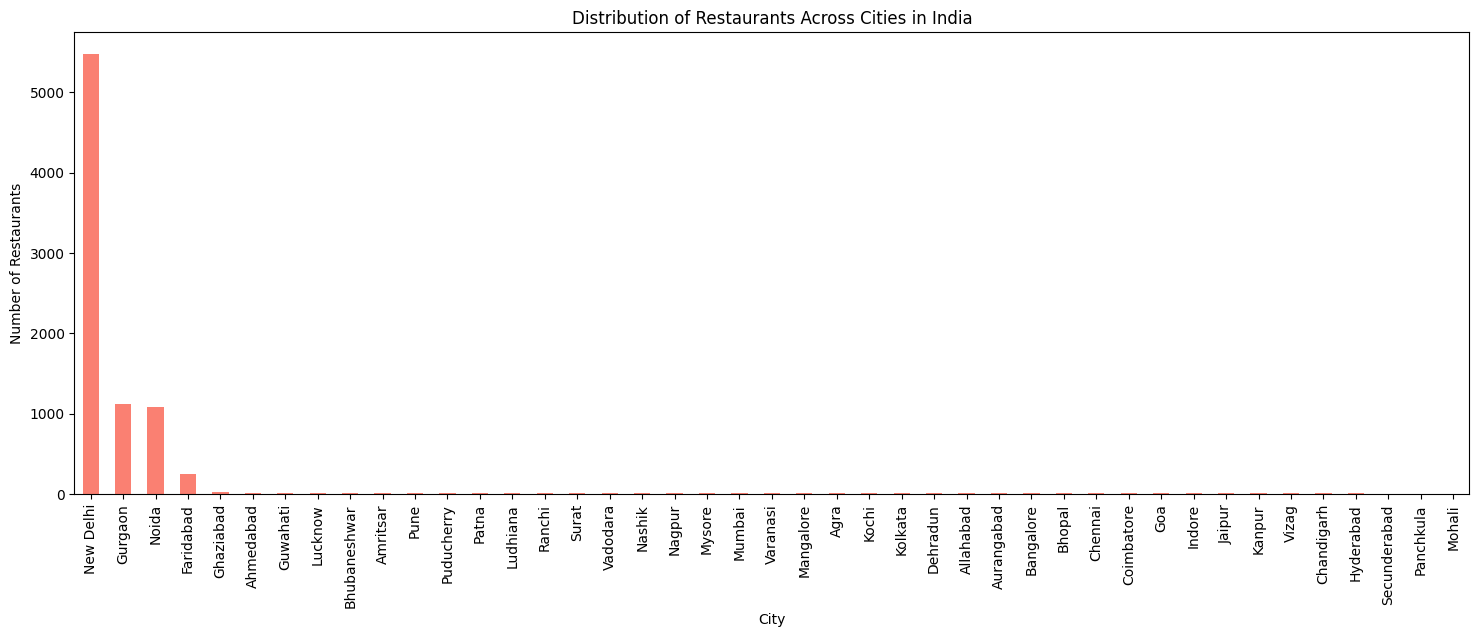

In [56]:
plt.figure(figsize=(18, 6))
city_distribution_india.plot(kind='bar', color='salmon')
plt.title('Distribution of Restaurants Across Cities in India')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

In [57]:
delhi_restaurants = final_df[final_df['City'] == 'New Delhi']

In [58]:
delhi_restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
2560,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,No,No,No,No,2,0.0,White,Not rated,2,India
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,No,Yes,No,No,1,3.2,Orange,Average,46,India
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Yes,Yes,No,No,3,3.4,Orange,Average,45,India
2563,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,No,No,No,No,2,2.6,Orange,Average,11,India
2564,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,No,Yes,No,No,2,3.4,Orange,Average,238,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,18445274,Motu N Patlu,1,New Delhi,"Batla House Chowk, Near Jamia Milia Islamia, O...",Zakir Nagar,"Zakir Nagar, New Delhi",77.285065,28.566246,"Lebanese, North Indian, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,0,India
8029,18168147,S.K. Fast Food,1,New Delhi,"161/32, Shop 3 Joga Bai, Main Road, Zakir Naga...",Zakir Nagar,"Zakir Nagar, New Delhi",77.283827,28.566189,Chinese,...,No,No,No,No,1,0.0,White,Not rated,0,India
8030,18429375,Sufiyan Restaurant,1,New Delhi,"57/12, Main Road, Zakir Nagar, New Delhi",Zakir Nagar,"Zakir Nagar, New Delhi",77.279779,28.567321,Mughlai,...,No,No,No,No,1,0.0,White,Not rated,0,India
8031,310479,The Relax Point,1,New Delhi,"92/17, Zakir Nagar, New Delhi",Zakir Nagar,"Zakir Nagar, New Delhi",77.278543,28.566849,North Indian,...,No,No,No,No,1,0.0,White,Not rated,1,India


In [59]:
delhi_locality = delhi_restaurants['Locality'].value_counts()

In [60]:
delhi_locality

Connaught Place                 122
Rajouri Garden                   99
Shahdara                         87
Defence Colony                   86
Pitampura                        85
                               ... 
Dr. Zakir Hussain Marg            1
Lemon Tree Premier, Aerocity      1
Tilak Marg                        1
Trilokpuri                        1
Aaya Nagar                        1
Name: Locality, Length: 254, dtype: int64

In [61]:
delhi_locality_names = delhi_restaurants['Locality'].value_counts().index

In [62]:
delhi_locality_names

Index(['Connaught Place', 'Rajouri Garden', 'Shahdara', 'Defence Colony',
       'Pitampura', 'Malviya Nagar', 'Mayur Vihar Phase 1', 'Rajinder Nagar',
       'Safdarjung', 'Satyaniketan',
       ...
       'T3 Domestic Arrival, Aerocity', 'Garden of Five Senses, Saket',
       'Kasbah, Greater Kailash (GK) 1', 'Kashmiri Gate', 'Durga Puri',
       'Dr. Zakir Hussain Marg', 'Lemon Tree Premier, Aerocity', 'Tilak Marg',
       'Trilokpuri', 'Aaya Nagar'],
      dtype='object', length=254)

([<matplotlib.patches.Wedge at 0x79df81fd0340>,
 [Text(0.766254947653327, 0.7892105898914417, 'Connaught Place'),
  Text(-0.6906626905308244, 0.856145459550375, 'Rajouri Garden'),
  Text(-1.0413813276203225, -0.3542949766560835, 'Shahdara'),
  Text(-0.11880724993216274, -1.093565195753576, 'Defence Colony'),
  Text(0.9334471278820494, -0.581959156168844, 'Pitampura')],
 [Text(0.41795724417454194, 0.43047850357714995, '25.47%'),
  Text(-0.3767251039259042, 0.4669884324820227, '20.67%'),
  Text(-0.568026178701994, -0.19325180544877282, '18.16%'),
  Text(-0.06480395450845239, -0.5964901067746777, '17.95%'),
  Text(0.5091529788447542, -0.3174322670011876, '17.75%')])

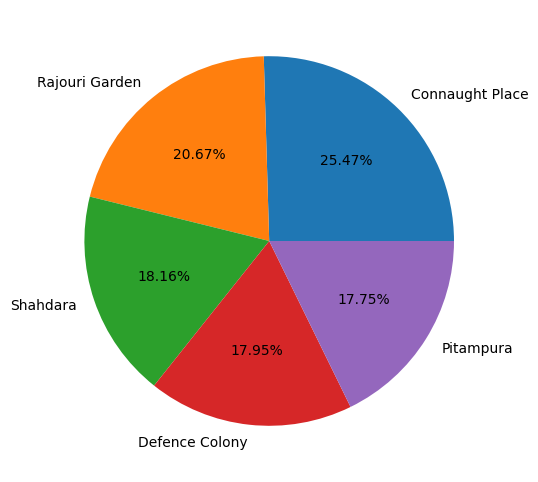

In [63]:
plt.pie(delhi_locality[:5],labels=delhi_locality_names[:5],autopct='%1.2f%%')

Cuisine Analysis:

In [64]:
India_Cusines = final_df[final_df['Country'] == 'India'] # Filtered the cusine of India

In [65]:
India_Cusines

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Sagar Nagar, Vizag",83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",...,No,No,No,No,2,3.6,Yellow,Good,193,India
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.000000,0.000000,"Cafe, North Indian, Chinese",...,No,No,No,No,2,3.7,Yellow,Good,85,India
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Siripuram, Vizag",83.315281,17.719539,"Burger, Pizza, Biryani",...,No,No,No,No,2,4.3,Green,Very Good,172,India
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.336840,17.721182,"American, North Indian, Thai, Continental",...,No,No,No,No,4,3.8,Yellow,Good,74,India


In [66]:
India_Cusines_types= India_Cusines['Cuisines'].value_counts().nlargest(10).index # Top 10 Indian cusine

In [67]:
India_Cusines_types

Index(['North Indian', 'North Indian, Chinese', 'Fast Food', 'Chinese',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food'],
      dtype='object')

In [68]:
top_India_cuisines_data = final_df[final_df['Cuisines'].isin(India_Cusines_types)]

In [69]:
top_India_cuisines_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
23,6601005,Cafí© Daniel Briand,30,Brasí_lia,"SCLN 104, Bloco A, Loja 26, Asa Norte, Brasí_lia",Asa Norte,"Asa Norte, Brasí_lia",-47.882667,-15.777500,Cafe,...,No,No,No,No,1,3.8,Yellow,Good,9,Brazil
24,6600292,Casa do Biscoito Mineiro,30,Brasí_lia,"SCLN 210, Bloco D, Loja 36/48, Asa Norte, Bras...",Asa Norte,"Asa Norte, Brasí_lia",-47.882136,-15.757472,Bakery,...,No,No,No,No,2,3.7,Yellow,Good,11,Brazil
88,17284094,Chick-fil-A,216,Albany,"2703 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219300,31.616000,Fast Food,...,No,No,No,No,1,3.5,Yellow,Good,67,United States
93,17284150,House of China Restaurant II,216,Albany,"2526 Dawson Rd Ste A, Albany, GA 31707",Albany,"Albany, Albany",-84.212000,31.610400,Chinese,...,No,No,No,No,1,3.8,Yellow,Good,153,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9528,6003668,Timboo Cafe,208,Ankara,"Kentpark AVM, Kat -1, Mustafa Kemal Mahallesi,...","Kentpark AVM, íìniversiteler, íankaya","Kentpark AVM, íìniversiteler, íankaya, Ankara",32.776255,39.908957,Cafe,...,No,No,No,No,3,4.2,Green,Very Good,79,Turkey
9531,6000747,The Bigos,208,Ankara,"Mahallesi, Selanik 2 Caddesi, No 61/A, íankay...",KÛ±zÛ±lay,"KÛ±zÛ±lay, Ankara",32.857917,39.916686,Cafe,...,No,No,No,No,3,3.8,Yellow,Good,123,Turkey
9538,5901782,Starbucks,208,ÛÁstanbul,"Bebek Mahallesi, Cevdetpaôa Caddesi, No 30/A,...",Bebek,"Bebek, ÛÁstanbul",29.043734,41.077696,Cafe,...,No,No,No,No,2,4.9,Dark Green,Excellent,1042,Turkey
9543,5916085,Dem Karakí_y,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, Hoca Ta...",Karakí_y,"Karakí_y, ÛÁstanbul",28.978237,41.024633,Cafe,...,No,No,No,No,2,4.5,Dark Green,Excellent,761,Turkey


<ipython-input-70-0a4eccfc426b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cuisines', y='Price range', data=top_India_cuisines_data, ci=None, order=India_Cusines_types)  # Set ci=None to hide error bars


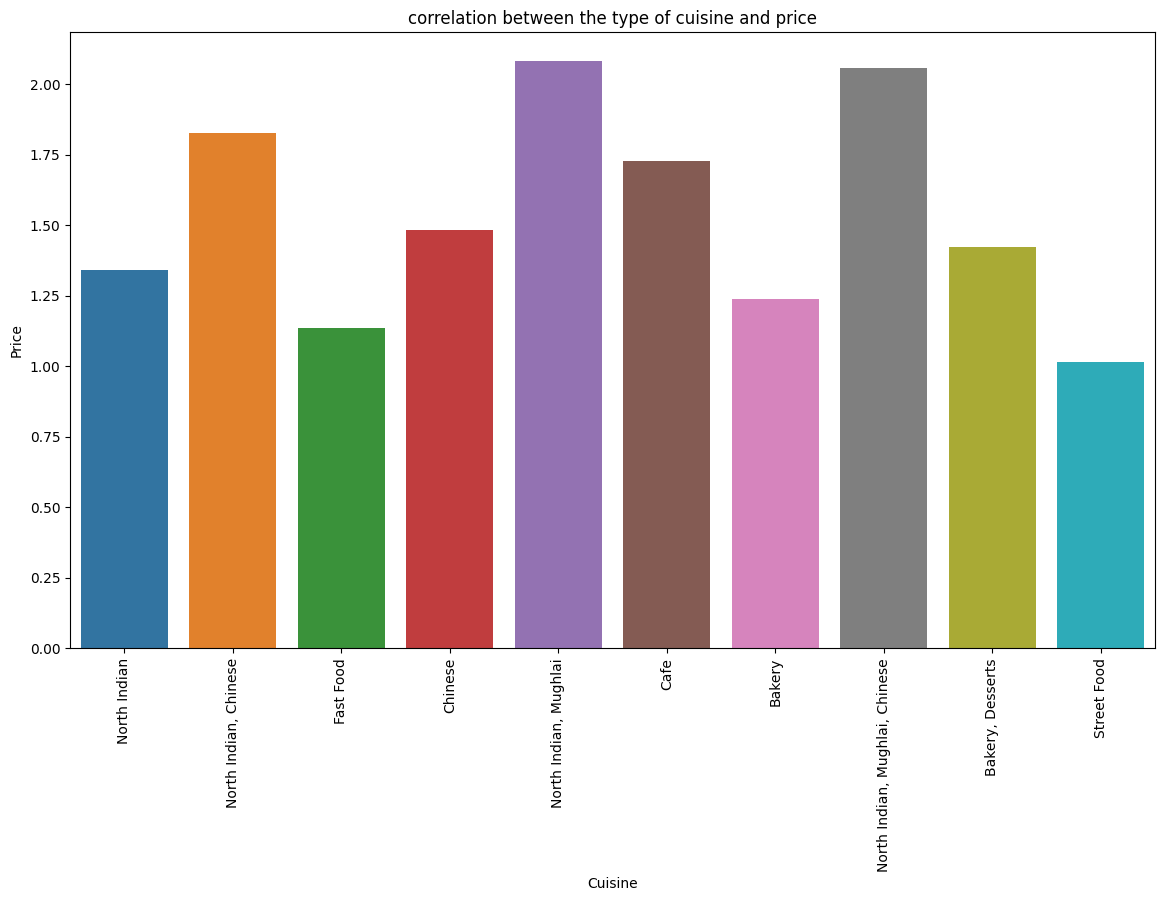

In [70]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Cuisines', y='Price range', data=top_India_cuisines_data, ci=None, order=India_Cusines_types)  # Set ci=None to hide error bars
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('correlation between the type of cuisine and price')
plt.xlabel('Cuisine')
plt.ylabel('Price')
plt.show()

cuisines that are more prevalent in certain regions

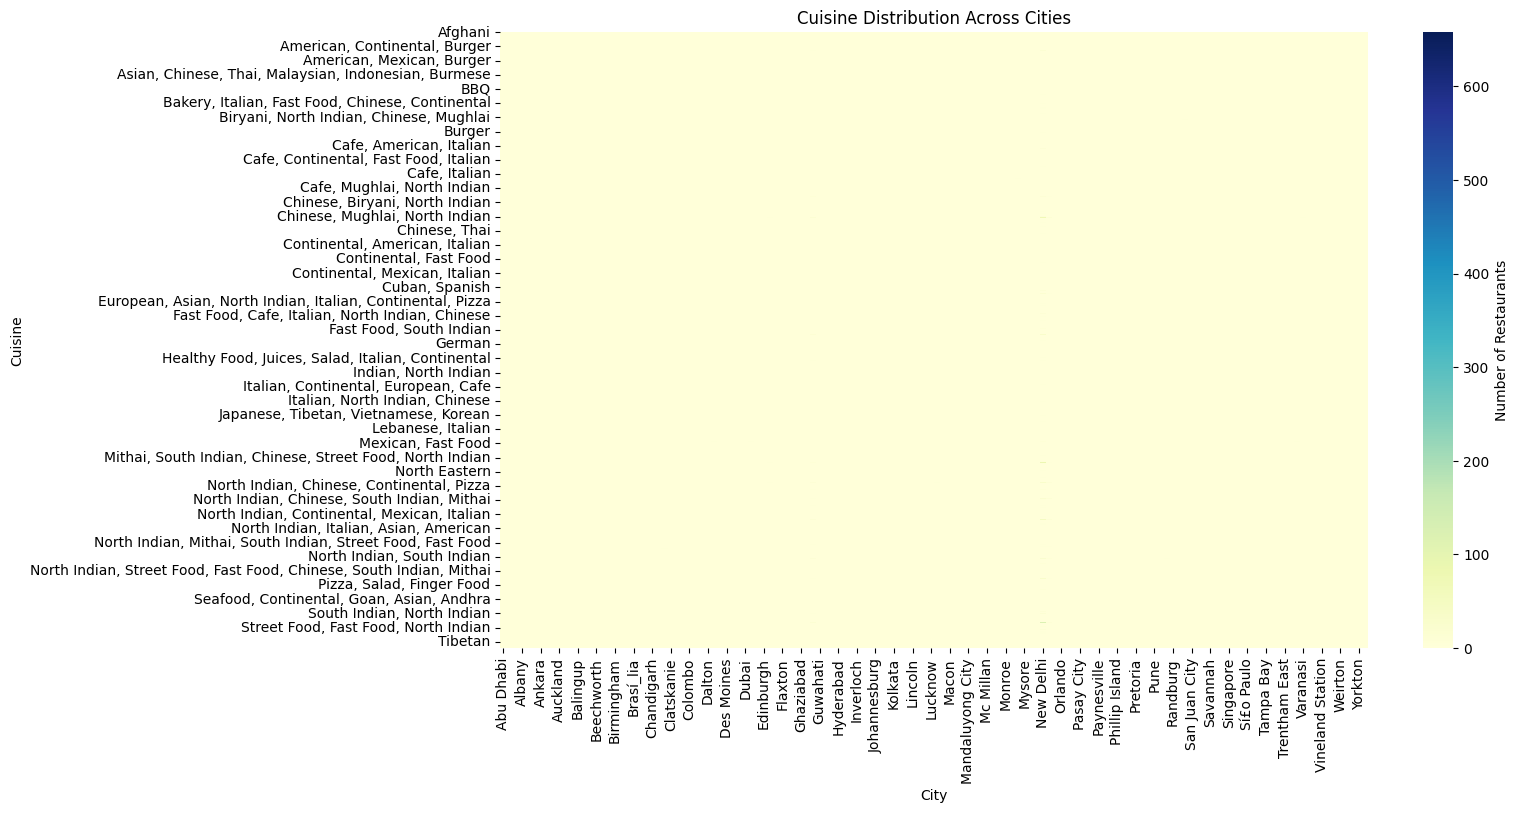

In [71]:


# Assuming 'Cuisines' and 'City' are columns in your DataFrame
# Create a cross-tabulation to represent the relationship between cuisines and regions
heatmap_data = pd.crosstab(final_df['Cuisines'], final_df['City'])

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Number of Restaurants'})
plt.title('Cuisine Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Cuisine')
plt.show()


Average Cost Analysis:

How does the avg Price range vary accross different countries?

In [72]:
avg_price_by_country = final_df.groupby('Country')['Price range'].mean().round(2).reset_index()

In [73]:
avg_price_by_country

,Country,Price range
0,Australia,2.12
1,Brazil,3.40
2,Canada,2.50
3,India,1.72
4,Indonesia,2.95
5,New Zealand,3.15
6,Phillipines,3.36
7,Qatar,3.65
8,Singapore,3.65
9,South Africa,3.58


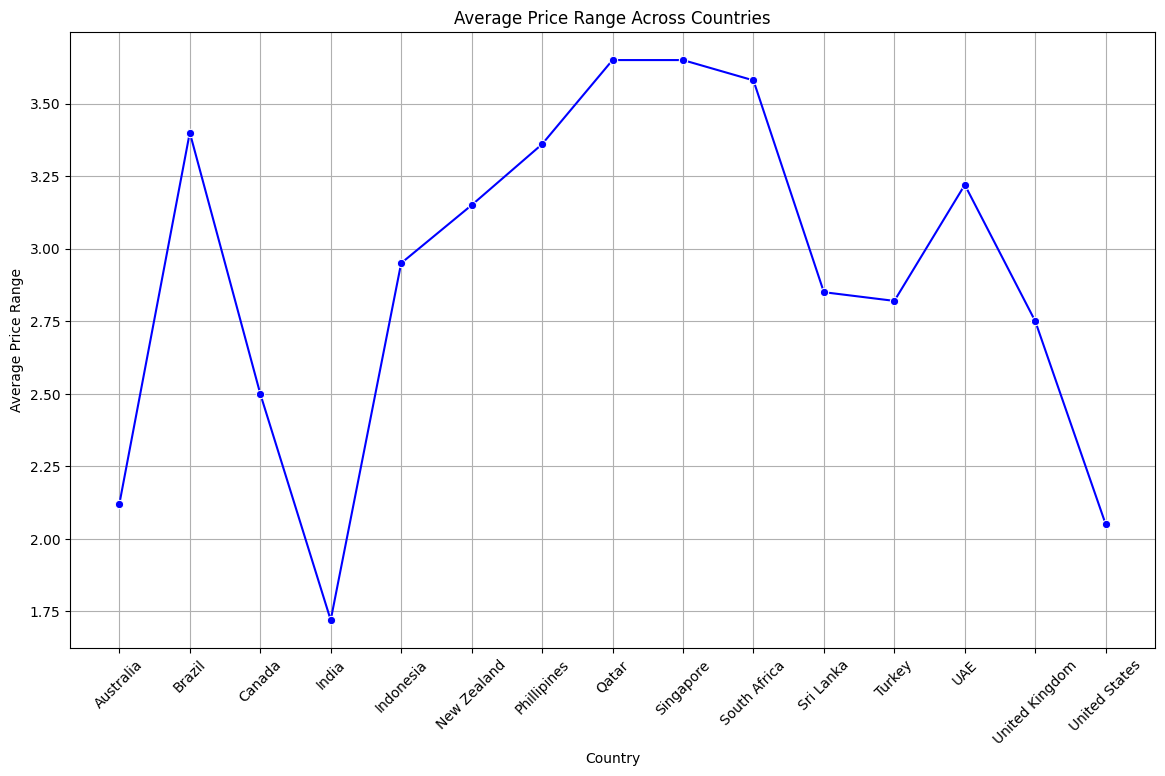

In [74]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Country', y='Price range', data=avg_price_by_country, marker='o', color='blue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Average Price Range Across Countries')
plt.xlabel('Country')
plt.ylabel('Average Price Range')
plt.grid(True)
plt.show()

Observation:

Average price range for India is 1.75.

correlation between the average cost and the restaurant's aggregate rating

In [75]:
avg_price_by_country

,Country,Price range
0,Australia,2.12
1,Brazil,3.40
2,Canada,2.50
3,India,1.72
4,Indonesia,2.95
5,New Zealand,3.15
6,Phillipines,3.36
7,Qatar,3.65
8,Singapore,3.65
9,South Africa,3.58


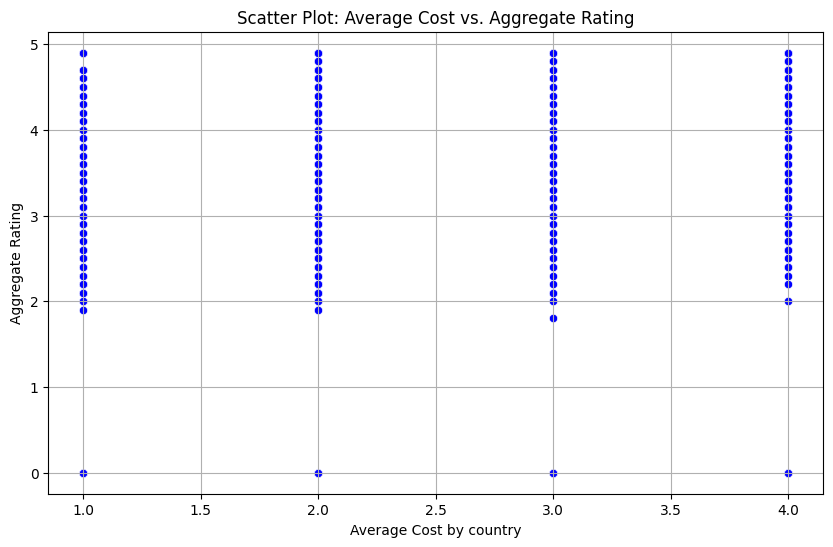

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price range', y='Aggregate rating', data=final_df, color='blue')
plt.title('Scatter Plot: Average Cost vs. Aggregate Rating')
plt.xlabel('Average Cost by country')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

Table Booking and Online Delivery:

percentage of restaurants offering table booking and online delivery

In [77]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [78]:
Table_booking= final_df[final_df['Has Table booking']=="Yes"]

In [79]:
Table_booking

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9403,6800569,Chaophraya,215,Manchester,"19 Chapel Walks, City Center, Market Street, M...",Market Street,"Market Street, Manchester",-2.243505,53.481740,Thai,...,Yes,No,No,No,4,4.3,Green,Very Good,422,United Kingdom
9415,6801873,Mr Cooper's House & Garden - The Midland,215,Manchester,"The Midland, Peter Street, Deansgate, Manchest...","The Midland, Deansgate","The Midland, Deansgate, Manchester",-2.245034,53.477358,"European, Mediterranean, Contemporary",...,Yes,No,No,No,3,4.2,Green,Very Good,67,United Kingdom
9431,18295472,Gymkhana,166,Doha,"Ground Floor, Al Jomrok Boutique Hotel, Souq W...",Souq Waqif,"Souq Waqif, Doha",51.533316,25.289411,Indian,...,Yes,No,No,No,4,4.7,Dark Green,Excellent,114,Qatar
9450,6400621,Nobu - One&Only,189,Cape Town,"One & Only Hotel, Dock Road, V & A Waterfront,...","One and Only Hotel, V & A Waterfront","One and Only Hotel, V & A Waterfront, Cape Town",18.416435,-33.908603,"Japanese, Asian, Seafood, Sushi",...,Yes,No,No,No,4,4.0,Green,Very Good,110,South Africa


In [80]:
Table_Booking_count= Table_booking['Has Table booking'].value_counts()

In [81]:
Table_Booking_count

Yes    1158
Name: Has Table booking, dtype: int64

In [82]:
Deliverling= final_df[final_df['Has Online delivery']=="Yes"]

In [83]:
Deliverling

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
565,5704255,Famous Dave's Barbecue,214,Abu Dhabi,"Near The One, Level 3, Abu Dhabi Mall, Tourist...","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",54.382946,24.495693,American,...,No,Yes,No,No,4,4.6,Dark Green,Excellent,376,UAE
566,5701978,Pizza Di Rocco,214,Abu Dhabi,Near Corner of Salam and Al Falah Street (9th ...,Al Dhafrah,"Al Dhafrah, Abu Dhabi",54.381931,24.485579,"Italian, Pizza",...,Yes,Yes,No,No,3,4.4,Green,Very Good,471,UAE
571,5700052,Cho Gao - Crowne Plaza Abu Dhabi,214,Abu Dhabi,"Crowne Plaza Abu Dhabi, Sheikh Hamdan Bin Moha...","Crowne Plaza Abu Dhabi, Al Markaziya","Crowne Plaza Abu Dhabi, Al Markaziya, Abu Dhabi",54.365694,24.491235,"Thai, Japanese, Chinese, Indonesian, Vietnamese",...,Yes,Yes,No,No,4,4.4,Green,Very Good,246,UAE
572,5702418,Gazebo,214,Abu Dhabi,"Ground Level, Next to E-Max, Dalma Mall, Mussa...","Dalma Mall, Mussafah Sanaiya","Dalma Mall, Mussafah Sanaiya, Abu Dhabi",54.524122,24.334217,"Indian, North Indian, Mughlai, Biryani",...,Yes,Yes,No,No,3,4.0,Green,Very Good,355,UAE
573,5700386,Sangeetha Vegetarian Restaurant,214,Abu Dhabi,"Opposite Cristal Hotel, Behind KM Trading, Ele...",Madinat Zayed,"Madinat Zayed, Abu Dhabi",54.363776,24.485253,"Indian, South Indian",...,No,Yes,No,No,2,3.6,Yellow,Good,268,UAE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,11371,Chili's,1,Pune,"UG 49, Phoenix Market City, Nagar Road, Viman ...","Phoenix Market City, Viman Nagar","Phoenix Market City, Viman Nagar, Pune",73.916619,18.562450,"Mexican, American, Tex-Mex",...,Yes,Yes,No,No,3,4.5,Dark Green,Excellent,1439,India
9168,18292672,Blue Water,1,Pune,"Punawale, Near Basket Bridge,Off Aundh-Ravet B...",Ravet,"Ravet, Pune",73.751081,18.636215,"North Indian, Chinese, Continental",...,Yes,Yes,No,No,3,4.2,Green,Very Good,487,India
9170,6507967,Tales & Spirits,1,Pune,"Plot 64, Shivaji Housing Society, Senapati Bap...",Senapati Bapat Road,"Senapati Bapat Road, Pune",73.828972,18.530963,"Italian, Continental, Cafe",...,Yes,Yes,No,No,2,4.1,Green,Very Good,997,India
9171,6506206,18 Degrees Resto Lounge,1,Pune,"8th & 9th Floor, Spot 18 Mall, Pimple Saudagar...","Spot 18 Mall, Pimple Saudagar","Spot 18 Mall, Pimple Saudagar, Pune",73.785901,18.593481,"North Indian, Mediterranean, Chinese",...,Yes,Yes,No,No,4,3.6,Yellow,Good,1566,India


In [84]:
Delivering_count= Deliverling['Has Online delivery'].value_counts()

In [85]:
Delivering_count

Yes    2451
Name: Has Online delivery, dtype: int64

In [86]:
num_rows = df.shape[0]

In [87]:
num_rows

9551

In [88]:

Table_Booking_Percentage = (Table_Booking_count / num_rows ) * 100




In [89]:
Table_Booking_Percentage

Yes    12.124385
Name: Has Table booking, dtype: float64

In [90]:

Online_Delivery_Percentage = (Delivering_count / num_rows ) * 100





In [91]:
Online_Delivery_Percentage

Yes    25.662234
Name: Has Online delivery, dtype: float64

 Observation-

 Table Booking = 12%
 Online delivery = 26%

correlation between restaurants that offer these services and their ratings or popularity

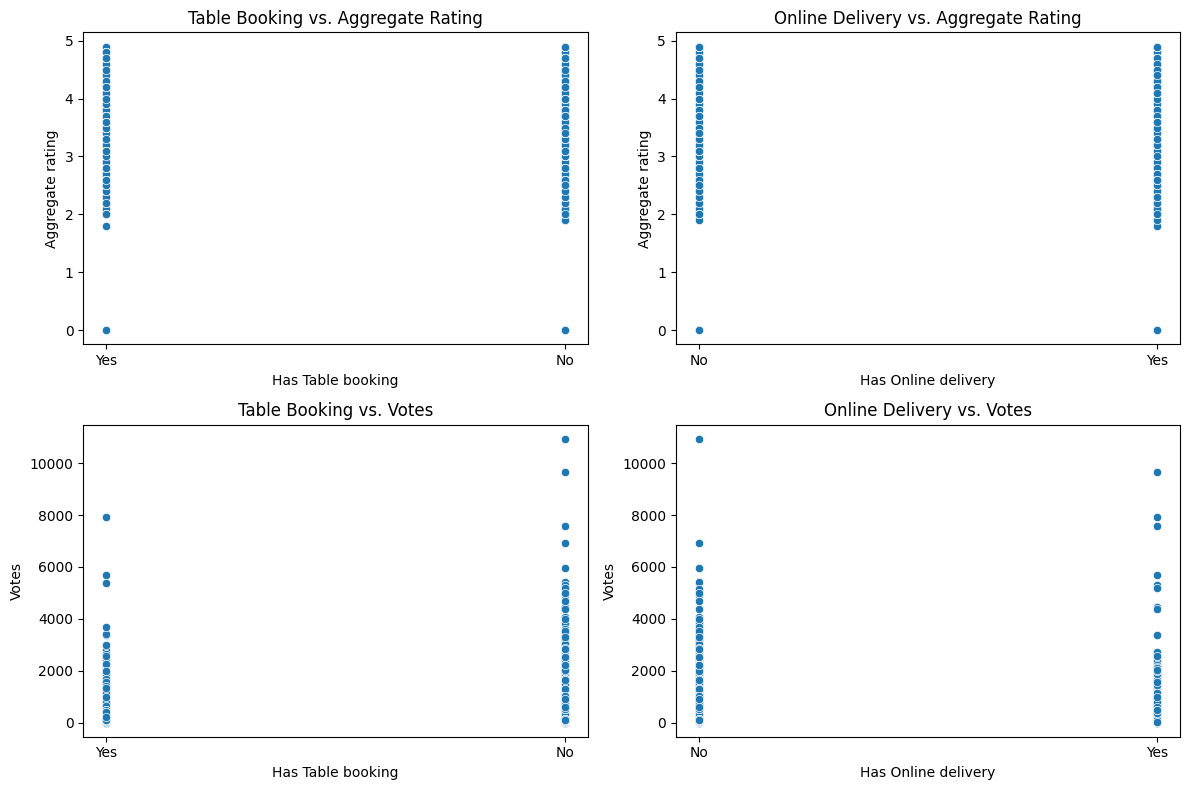

In [92]:
# Assuming 'Table Booking', 'Online Delivery', 'Aggregate rating', and 'Votes' are columns in your DataFrame
plt.figure(figsize=(12, 8))

# Scatter plot between Table Booking and Aggregate Rating
plt.subplot(2, 2, 1)
sns.scatterplot(x='Has Table booking', y='Aggregate rating', data=final_df)
plt.title('Table Booking vs. Aggregate Rating')

# Scatter plot between Online Delivery and Aggregate Rating
plt.subplot(2, 2, 2)
sns.scatterplot(x='Has Online delivery', y='Aggregate rating', data=final_df)
plt.title('Online Delivery vs. Aggregate Rating')

# Scatter plot between Table Booking and Votes
plt.subplot(2, 2, 3)
sns.scatterplot(x='Has Table booking', y='Votes', data=final_df)
plt.title('Table Booking vs. Votes')

# Scatter plot between Online Delivery and Votes
plt.subplot(2, 2, 4)
sns.scatterplot(x='Has Online delivery', y='Votes', data=final_df)
plt.title('Online Delivery vs. Votes')

plt.tight_layout()
plt.show()

User Interaction and Ratings:

distribution of aggregate ratings for restaurants

Text(0, 0.5, 'Frequency')

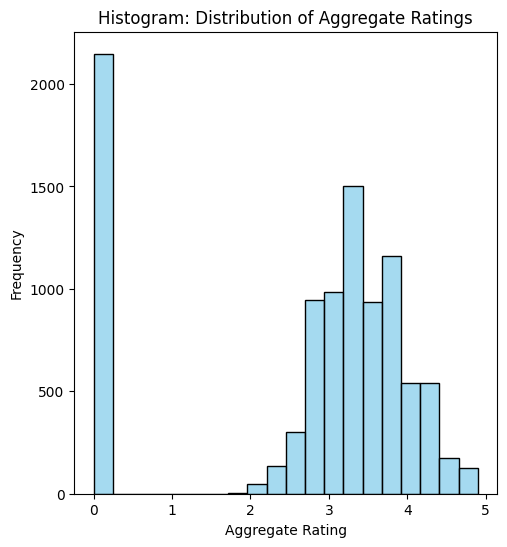

In [93]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Aggregate rating'], bins=20, kde=False, color='skyblue')
plt.title('Histogram: Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')

Observation: Most aggregated rating lie between 3 and 4.

relationship between the number of votes a restaurant receives and its overall rating

Text(0.5, 1.0, 'Online Delivery vs. Votes')

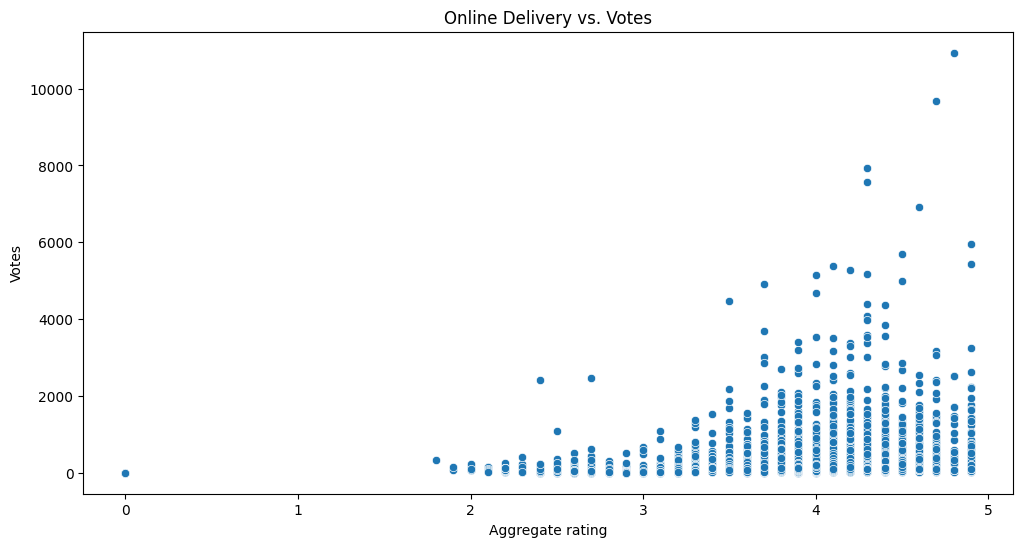

In [94]:
sns.scatterplot(x='Aggregate rating', y='Votes', data=final_df)
plt.title('Online Delivery vs. Votes')

Observation- As the rating increases the vote count increases

Price Range Analysis:

What is the distribution of restaurants across different price ranges?

Text(0, 0.5, 'Frequency')

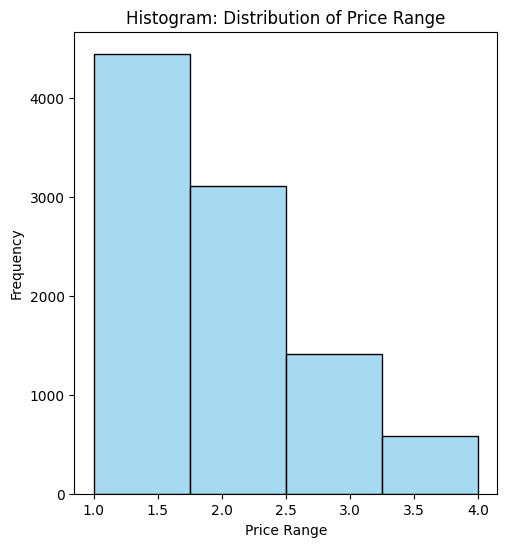

In [95]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Price range'], bins=4, kde=False, color='skyblue')
plt.title('Histogram: Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')

Observation: Most restraunts lie in the price range of 1 - 1.75

Delivery Status:

percentage of restaurants are currently delivering

In [96]:
Currently_delivering=final_df[final_df['Is delivering now']=='Yes']

In [97]:
Currently_delivering_count= Currently_delivering['Is delivering now'].value_counts()

In [98]:
Currently_delivering_count

Yes    34
Name: Is delivering now, dtype: int64

In [99]:
Currently_delivering_percentage= (Currently_delivering_count/num_rows)*100

In [100]:
Currently_delivering_percentage

Yes    0.355984
Name: Is delivering now, dtype: float64

Observation: Only 0.35% of the restaraunts are currently delivering.

correlation between the delivery status and the restaurant's popularity or rating

Text(0.5, 1.0, 'Online Delivery vs. Votes')

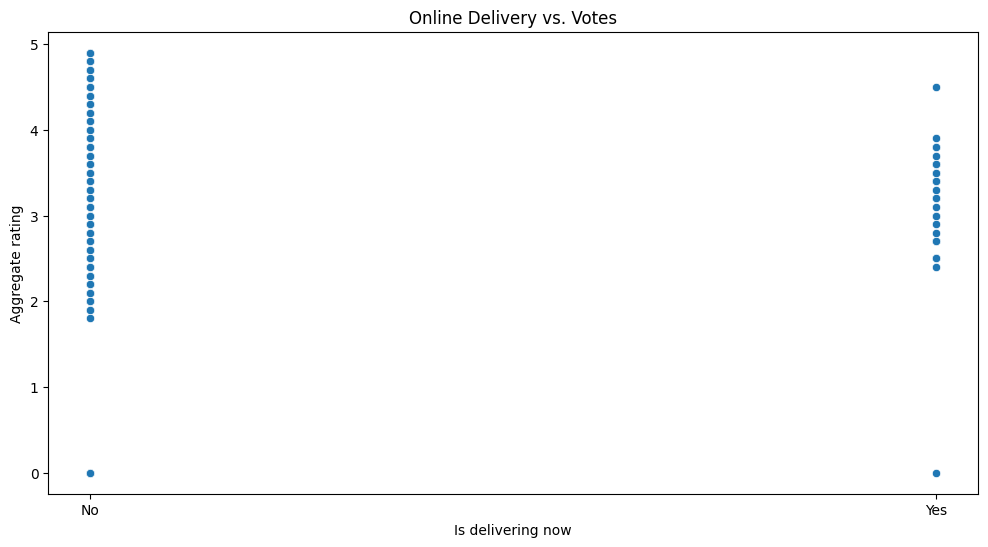

In [101]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Is delivering now', y='Aggregate rating', data=final_df)
plt.title('Online Delivery vs. Votes')

Observation: For not delivering now the aggregated raing is more.

Impact of Switch to Order Menu:

Number of resaraunts that encourage users to switch to the order menu

In [106]:
final_df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [103]:
order_menu=final_df[final_df['Switch to order menu']=='Yes']

In [104]:
order_menu

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


Observation: No restauraunts support switch to order meny feature.

marketing stratergy

Zomato's market penetration in different countries

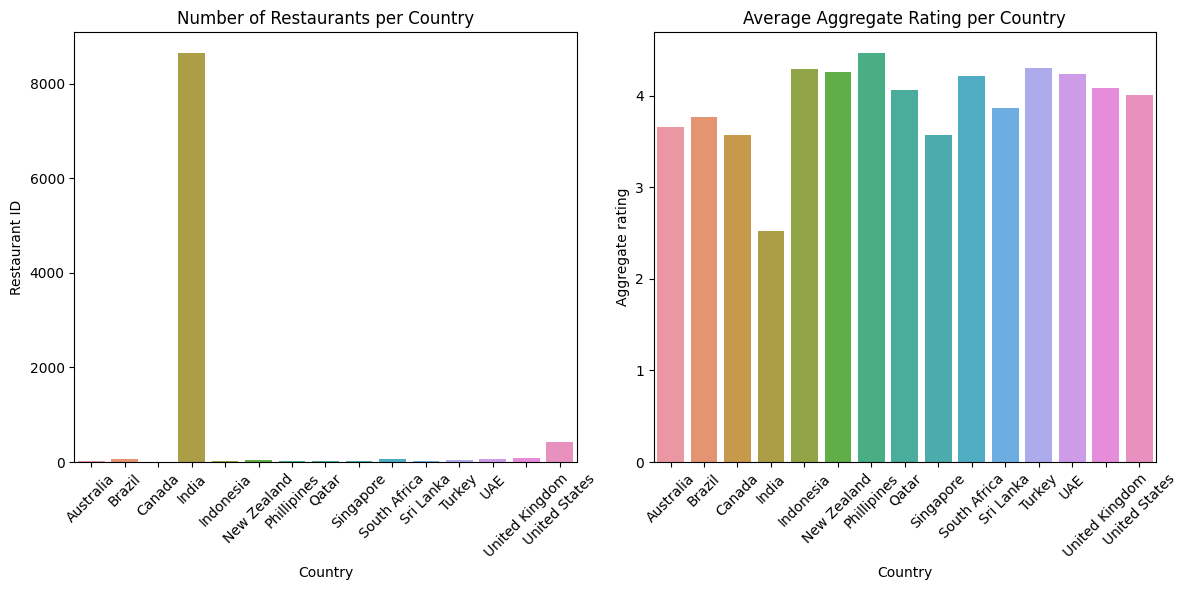

In [107]:
restaurants_per_country = final_df.groupby('Country')['Restaurant ID'].nunique().reset_index()

# Calculate average aggregate rating per country
avg_rating_per_country = final_df.groupby('Country')['Aggregate rating'].mean().reset_index()

# Merge the two datasets
market_penetration_data = pd.merge(restaurants_per_country, avg_rating_per_country, on='Country', how='outer')

# Visualize the data
plt.figure(figsize=(12, 6))

# Bar chart for the number of restaurants per country
plt.subplot(1, 2, 1)
sns.barplot(x='Country', y='Restaurant ID', data=market_penetration_data)
plt.title('Number of Restaurants per Country')
plt.xticks(rotation=45)

# Bar chart for average aggregate rating per country
plt.subplot(1, 2, 2)
sns.barplot(x='Country', y='Aggregate rating', data=market_penetration_data)
plt.title('Average Aggregate Rating per Country')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Observation: India has the largest number of restauraunts, but has average aggregated rating of 2.5.

Word Cloud of retauraunt name

In [108]:
pip install wordcloud

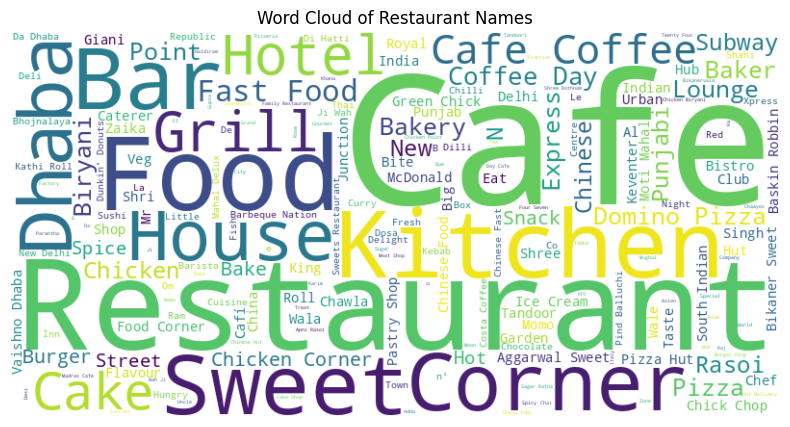

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'Restaurant Name' is a column in your DataFrame
# Replace 'your_dataset.csv' with the actual dataset file name
# Replace 'Restaurant Name' with the actual column name if needed

# Load your Zomato dataset
# zomato_data = pd.read_csv('your_dataset.csv')

# Combine all restaurant names into a single string
restaurant_names_text = ' '.join(final_df['Restaurant Name'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(restaurant_names_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Restaurant Names')
plt.show()

Observation: Cafe is the most used word in retaraunt name.

**Conclusions:**

1. Geographic Distribution: The majority of Zomato's records or transactions are from India, followed by the USA and then the UK.

2. Rating Classifications: The rating classifications suggest that most restaurants on Zomato have ratings falling into the categories of Excellent, Very Good, and Good.

3. Rating Colors: Orange and red are the predominant colors for restaurant ratings, indicating low ratings. The maximum number of 0 ratings comes from Indian customers.

4. Online Deliveries: Online deliveries are available in India and the UAE, suggesting a focus on these markets for delivery services.

5. City-wise Analysis in India: New Delhi, Gurgaon, and Noida are the top three cities with the most restaurants. In New Delhi, Connaught Place and Rajouri Garden have the highest number of restaurants.

6. Cuisine Preferences: The top three cuisines on Zomato are North Indian, Chinese, and Fast Food.

7. India's Dominance: India has the largest number of restaurants on Zomato, with a maximum number of records.

8. Average Price Range: The average price range for restaurants in India is 1.75.

9. Service Offerings: Around 12% of restaurants offer table booking, and 26% provide online delivery services.

10. Aggregated Ratings: Most aggregated ratings fall between 3 and 4, indicating a generally positive perception.

11. Vote Count and Rating: There is a positive correlation between higher ratings and increased vote counts.

12. Price Range Distribution: Most restaurants fall into the price range of 1 to 1.75.

13. Current Delivery Status: Only 0.35% of restaurants are currently delivering, suggesting potential for growth in delivery services.

14. Aggregated Rating and Delivery Status: Restaurants not delivering now tend to have higher aggregated ratings.

15. Ordering Menu Switch: No restaurants support the "Switch to Order Menu" feature.

16. Indian Market Analysis: Despite having the largest number of restaurants, India's average aggregated rating is 2.5, indicating room for improvement.
Common Term in Restaurant Names: "Cafe" is the most frequently used word in restaurant names.


**Next Steps/Advice:**

1. Market Expansion: Consider further market expansion in India and the UAE, where online delivery services are popular.

2. Customer Engagement: Focus on engaging Indian customers to improve their ratings and encourage more reviews.

3. City-specific Strategies: Develop city-specific strategies, especially in top-performing cities like New Delhi, Gurgaon, and Noida.

4. Cuisine Diversity: Explore opportunities to diversify cuisines or tailor offerings based on popular preferences.

5. Price Optimization: Evaluate pricing strategies to ensure competitiveness and customer satisfaction.

6. Service Enhancement: Encourage more restaurants to provide online delivery services and promote the "Switch to Order Menu" feature.

7. Quality Improvement: Address the lower average aggregated rating in India through quality improvement initiatives.

8. Delivery Service Growth: Consider initiatives to increase the percentage of restaurants offering delivery services beyond the current 0.35%.

9. Marketing Campaigns: Leverage the popularity of the term "Cafe" in restaurant names for targeted marketing campaigns.

10. User Experience: Continuously enhance the user experience to maintain positive ratings and attract more customers.